# Importing Required Libraries
In this cell, we import the necessary libraries for audio processing, machine learning, and visualization. These include:
- **librosa**: Used for audio analysis and feature extraction.
- **matplotlib**: For plotting visualizations.
- **numpy**: For numerical operations on data.
- **sklearn**: For machine learning tasks like splitting the dataset.
- **tensorflow**: For building and training deep learning models.


In [1]:
import librosa, librosa.display
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os
import librosa
import math
import json
import numpy as np
from sklearn.model_selection import train_test_split
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import tensorflow as tf
import matplotlib.pyplot as plt
from glob import glob
from IPython.display import Audio

## Downloading and Moving the Dataset

In this section, we will download the **RAVDESS Emotional Speech Audio** dataset from Kaggle using the `kagglehub` library and move it to a specified directory on the system.

### Steps:

1. **Import Required Libraries**  
   - We import the necessary libraries:
     - **`kagglehub`**: For downloading datasets from Kaggle.
     - **`shutil`**: For moving the downloaded dataset to a new location.
     - **`os`**: For handling directory operations (creating directories if they don't exist).

2. **Download Dataset**  
   - The dataset is downloaded from Kaggle using the `kagglehub.dataset_download()` function. The dataset **RAVDESS Emotional Speech Audio** is identified by the identifier `uwrfkaggler/ravdess-emotional-speech-audio`. The downloaded dataset is stored in the default cache directory: `~/.cache/kagglehub/datasets`.

3. **Define Destination Path**  
   - The target directory where the dataset will be moved is defined as **`/content/sample_data/`**. This is a typical directory for storing files in Google Colab.

4. **Ensure Destination Directory Exists**  
   - The `os.makedirs()` function is used to ensure that the destination directory exists. If it does not exist, it will be created. The `exist_ok=True` argument ensures no error occurs if the directory already exists.

5. **Move the Dataset**  
   - Using `shutil.move()`, the dataset is moved from the cache directory to the defined destination path.

6. **Print Confirmation**  
   - A confirmation message is printed to indicate that the dataset has been successfully moved to the specified destination.

In [2]:
import kagglehub
import shutil
import os

# Download the dataset (defaults to ~/.cache/kagglehub/datasets)
dataset_path = kagglehub.dataset_download("uwrfkaggler/ravdess-emotional-speech-audio")

# Define your target path
destination_path = "/content/sample_data/"

# Ensure the destination directory exists
os.makedirs(destination_path, exist_ok=True)

# Move the dataset to the desired location
shutil.move(dataset_path, destination_path)

print("Dataset moved to:", destination_path)


100%|██████████| 429M/429M [00:11<00:00, 39.6MB/s]

Extracting files...


Dataset moved to: /content/sample_data/


## Loading Audio Files from a Directory

In this section, we will load all the **`.wav`** audio files from a specified directory using the `glob` function.

### Steps:

1. **Define the Directory**  
   - The variable `data_dir` specifies the path to the directory containing the audio files. In this case, the directory is set to **`/content/sample_data/1/Actor_01`**.

2. **Retrieve Audio Files**  
   - The `glob` function is used to retrieve all audio files in the specified directory. It searches for files with the `.wav` extension in the `data_dir` path. The result is stored in the `audio_files` variable.

3. **File Path Pattern**  
   - The pattern `data_dir+"/*.wav"` is used to match all `.wav` files in the directory.

In [3]:
data_dir = '/content/sample_data/1/Actor_01'
audio_files = glob(data_dir+"/*.wav")

## Accessing the First Audio File

In this step, we access the first audio file from the list of files retrieved in the previous step.

### Step:

1. **Access the First File**  
   - The variable `audio_files` contains a list of `.wav` file paths obtained from the directory. We access the first file in this list by using index `0` and store it in the variable `file`.

In [4]:
file = audio_files[0]

## Loading the Audio File

In this step, we load the audio file into memory using **librosa** and specify the sampling rate for processing.

### Steps:

1. **Load the Audio File**  
   - The `librosa.load()` function is used to load the audio file specified by the `file` variable into memory.
   - The `sr=22050` argument sets the **sampling rate** to **22,050 Hz**. This is a common sampling rate for audio processing tasks as it balances quality and processing speed.

2. **Output**  
   - The `librosa.load()` function returns two values:
     - `signal`: The audio time series as a NumPy array (the actual audio signal).
     - `sr`: The sampling rate (which is 22,050 Hz in this case).

In [5]:
signal,sr = librosa.load(file,sr=22050)

## Playing the Audio File

In this step, we play the audio file using the **IPython** display module to visualize and listen to the audio signal.

### Steps:

1. **Audio Playback**  
   - The `Audio()` function from the **IPython.display** module is used to play the audio. It takes two arguments:
     - `data`: The audio signal (`signal`), which is the waveform data loaded earlier.
     - `rate`: The sampling rate (`sr`), which is the rate at which the audio was sampled (22,050 Hz in this case).

2. **Playback**  
   - This will display an interactive audio player in the notebook, allowing you to play the audio directly within the environment.

In [6]:
Audio(data=signal,rate=sr)

## Visualizing the Audio Waveform

In this step, we plot the waveform of the audio signal using **Matplotlib** to visualize the changes in amplitude over time.

### Steps:

1. **Create a Plot**  
   - The `plt.figure(figsize=(10, 4))` command creates a new figure with a specified size (10 inches by 4 inches).
   
2. **Plot the Audio Signal**  
   - The `plt.plot(signal)` function plots the **audio signal** (`signal`), which is the time series of the audio. The x-axis represents **time**, and the y-axis represents **amplitude**.

3. **Set Plot Titles and Labels**  
   - The `plt.title("Waveform")` adds a title to the plot.
   - The `plt.xlabel("Time")` and `plt.ylabel("Amplitude")` label the x-axis as "Time" and the y-axis as "Amplitude", respectively.

4. **Save the Plot**  
   - The `plt.savefig('wave_form.png')` command saves the plot as an image named **`wave_form.png`** in the current working directory.

5. **Show the Plot**  
   - The `plt.show()` function displays the plot in the notebook.

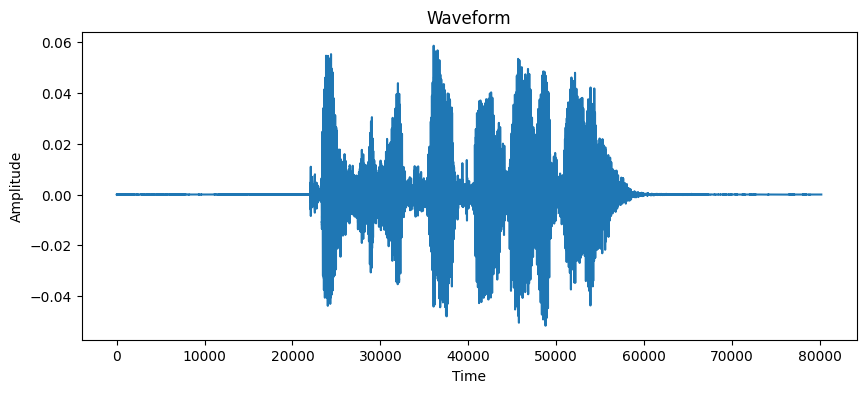

In [7]:
plt.figure(figsize=(10, 4))
plt.plot(signal)
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.savefig('wave_form.png')  # Save the plot as an image
plt.show()

## Computing the Fourier Transform

In this step, we compute the **Fast Fourier Transform (FFT)** of the audio signal to analyze its frequency components.

### Steps:

1. **Compute the FFT**  
   - The `np.fft.fft(signal)` function computes the **Fast Fourier Transform (FFT)** of the audio signal (`signal`), which converts the time-domain signal into the frequency domain. The result is stored in the variable `fft`.

2. **FFT Output**  
   - The result `fft` is a complex-valued array representing the amplitudes and phases of the frequency components of the audio signal.

In [8]:
fft = np.fft.fft(signal)
fft

array([ 0.03617289+0.j        , -0.02890482+0.0264992j ,
       -0.00534203-0.02522842j, ...,  0.013156  +0.00415419j,
       -0.00534203+0.02522842j, -0.02890482-0.0264992j ], dtype=complex64)

## Calculating the Magnitude of the FFT

In this step, we calculate the **magnitude** of the FFT to obtain the amplitude of the frequency components of the audio signal.

### Steps:

1. **Calculate Magnitude**  
   - The `np.abs(fft)` function computes the **magnitude** of the FFT, which represents the amplitude of the frequency components. This is done by taking the absolute value of the complex numbers in the FFT result.
   
2. **Magnitude Output**  
   - The resulting `magnitude` is an array containing the magnitudes of each frequency component. It shows how much of each frequency is present in the audio signal.

In [9]:
magnitude = np.abs(fft)
magnitude

array([0.03617289, 0.03921347, 0.0257878 , ..., 0.0137963 , 0.0257878 ,
       0.03921347], dtype=float32)

In [10]:
frequency = np.linspace(0,sr,len(magnitude))

Text(0, 0.5, 'Magnitude')

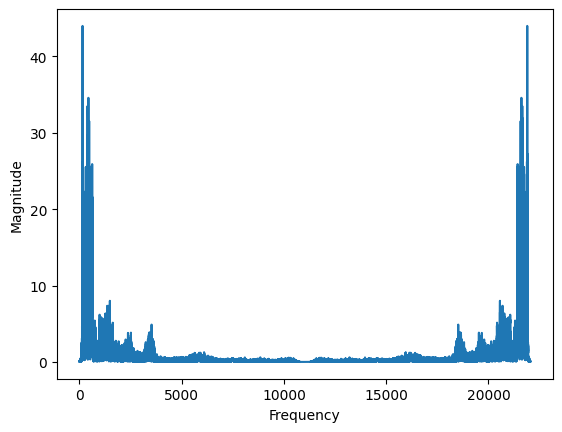

In [11]:
plt.plot(frequency,magnitude)
plt.xlabel("Frequency")
plt.ylabel('Magnitude')

In [12]:

#symmetric plot : we need only the half
left_frequency = frequency[:int(len(frequency)/2)]

In [13]:
left_magnitude = magnitude[:int(len(magnitude)/2)]

Text(0, 0.5, 'Magnitude')

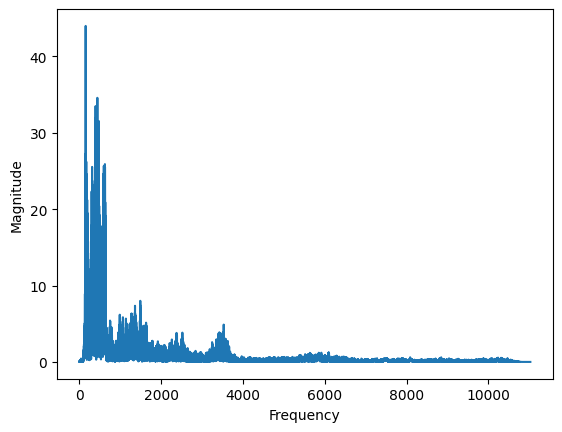

In [14]:
plt.plot(left_frequency,left_magnitude)
plt.xlabel("Frequency")
plt.ylabel('Magnitude')

In [15]:
# creating short term fourier transform
hop_length = 512
n_fft = 2048

## Computing the Short-Time Fourier Transform (STFT) and Log-Spectrogram

In this step, we compute the **Short-Time Fourier Transform (STFT)** of the audio signal and convert it into a **logarithmic spectrogram** for better visualization of frequency content over time.

### Steps:

1. **Compute the STFT**  
   - The `librosa.core.stft(signal, n_fft=n_fft, hop_length=hop_length)` function computes the **Short-Time Fourier Transform (STFT)** of the audio signal (`signal`). The STFT breaks the signal into overlapping frames to capture its time-varying frequency content.
     - `n_fft`: The number of samples per FFT frame, which determines the resolution of the frequency axis.
     - `hop_length`: The number of samples between successive frames, which controls the time resolution.
   
2. **Compute the Magnitude Spectrogram**  
   - The `np.abs(stft)` function calculates the **magnitude** of the STFT, resulting in a spectrogram that shows how the amplitude of different frequencies changes over time.
   
3. **Convert to Logarithmic Scale**  
   - The `librosa.amplitude_to_db(spectrogram)` function converts the magnitude spectrogram into a **logarithmic scale (dB)**. This transformation makes it easier to visualize both low and high amplitudes and enhances the features with lower amplitudes.

In [16]:
stft = librosa.core.stft(signal,n_fft=n_fft,hop_length=hop_length)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

## Visualizing the Log-Spectrogram

In this step, we visualize the **logarithmic spectrogram** of the audio signal using **Matplotlib** and **librosa.display**.

### Steps:

1. **Display the Log-Spectrogram**  
   - The `librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)` function displays the **logarithmic spectrogram**. It uses the following parameters:
     - `log_spectrogram`: The log-transformed magnitude spectrogram, which was calculated in the previous step.
     - `sr`: The sampling rate of the audio signal.
     - `hop_length`: The number of samples between successive frames (which controls the time resolution of the spectrogram).

2. **Add Axis Labels**  
   - The `plt.xlabel('Time')` and `plt.ylabel('Frequency')` functions label the x-axis as "Time" and the y-axis as "Frequency".

3. **Add Colorbar**  
   - The `plt.colorbar()` function adds a colorbar to the plot, which represents the amplitude (in decibels) at each frequency and time point.

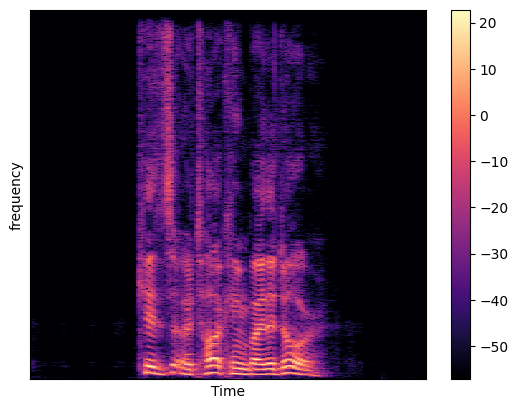

In [17]:
librosa.display.specshow(log_spectrogram,sr=sr,hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('frequency')
plt.colorbar()

## Extracting MFCCs (Mel-Frequency Cepstral Coefficients)

In this step, we extract the **Mel-Frequency Cepstral Coefficients (MFCCs)** from the audio signal. MFCCs are widely used features in speech and audio processing.

### Steps:

1. **Compute MFCCs**  
   - The `librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)` function computes the **MFCCs** from the audio signal (`signal`). The parameters used are:
     - `y`: The audio signal to analyze.
     - `sr`: The sampling rate of the audio signal.
     - `n_fft`: The number of samples per FFT frame (controls frequency resolution).
     - `hop_length`: The number of samples between successive frames (controls time resolution).
     - `n_mfcc`: The number of MFCC coefficients to extract. In this case, 13 coefficients are computed.

2. **MFCC Output**  
   - The resulting `MFCCs` is a 2D array where each row corresponds to an MFCC feature, and each column represents a time frame in the signal.

In [18]:
MFCCs = librosa.feature.mfcc(y=signal, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)


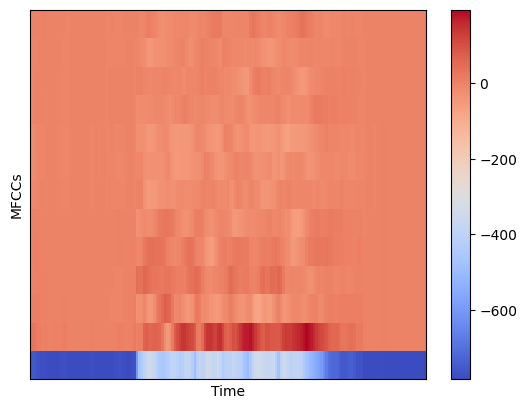

In [19]:
librosa.display.specshow(MFCCs,sr=sr,hop_length=hop_length)
plt.xlabel('Time')
plt.ylabel('MFCCs')
plt.colorbar()


## Extracting Pitches Using **Piptrack**

In this step, we use the **Piptrack** algorithm from **librosa** to extract the pitch and magnitude information from the audio signal.

### Steps:

1. **Compute Pitch and Magnitude**  
   - The `librosa.piptrack(y=signal, sr=sr)` function computes the **pitch** and **magnitude** of the audio signal (`signal`) using the **Piptrack** algorithm. This method tracks the pitch of the signal across time frames.
     - `y`: The audio signal to analyze.
     - `sr`: The sampling rate of the audio signal.
   
2. **Output**  
   - The function returns two arrays:
     - `pitches`: An array of pitch values (frequencies) detected in the signal.
     - `magnitudes`: An array of the magnitudes corresponding to each pitch, representing their intensities.
   
3. **Print the Pitches**  
   - The `print(pitches)` command outputs the extracted pitch values.

In [20]:
pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)
print(pitches)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [21]:
pitches.shape

(1025, 157)

In [22]:
signal1,sr = librosa.load(audio_files[55],sr=22050)

In [23]:
pitches, magnitudes = librosa.piptrack(y=signal, sr=sr)

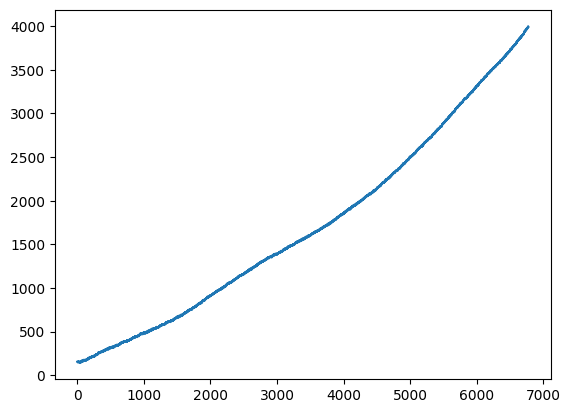

In [24]:
plt.plot(pitches[pitches!=0])

In [25]:
#RAVDESS DATASET
DATASET_PATH = "/content/sample_data/1"
JSON_PATH = "/content/sample_data/mfcc_form.json"
SAMPLE_RATE = 22050
DURATION = 3 # duration of each track is 30 s
SAMPLES_PER_TRACK = SAMPLE_RATE *DURATION

## Saving MFCC Features from Audio Files to JSON

In this step, we extract **Mel-Frequency Cepstral Coefficients (MFCCs)** from audio files and save them to a **JSON file** for later use in machine learning tasks. The process involves segmenting the audio files, extracting MFCC features from each segment, and storing the results along with their labels in a structured format.

### Steps:

1. **Dataset and Parameters**  
   - `DATASET_PATH`: Path to the directory containing the audio files.
   - `JSON_PATH`: Path where the JSON file with the MFCC data will be saved.
   - `SAMPLE_RATE`: Sampling rate for loading the audio files (22,050 Hz).
   - `DURATION`: Duration of each audio track (in seconds).
   - `SAMPLES_PER_TRACK`: Total number of samples per track, calculated by multiplying the sampling rate and duration.
   - `num_segments`: Number of segments to divide each track into for MFCC extraction.

2. **Function: `save_mfcc`**  
   - The function `save_mfcc` performs the following tasks:
     - Initializes a dictionary to store MFCC features and labels.
     - Loops through the dataset directory and processes each audio file:
       - Loads the audio signal using `librosa.load()`.
       - Segments the audio signal and extracts MFCCs for each segment using `librosa.feature.mfcc()`.
       - Stores the MFCC features and their corresponding labels (extracted from the filename) in the dictionary.
     - The data is saved as a **JSON file**.

3. **Process of Extracting MFCCs**  
   - The audio signal is segmented into smaller parts to extract MFCCs. The number of segments is determined by the `num_segments` parameter.
   - For each segment, MFCCs are computed and stored if the segment has the expected number of MFCC vectors.
   - Labels are derived from the filename, assuming the label is encoded in the file name (e.g., the third element separated by `-`).

4. **Saving to JSON**  
   - The extracted MFCC features and their labels are saved to a **JSON file** using the `json.dump()` method.


In [26]:
import librosa
import math
import os
import json

# Define the dataset paths and parameters
DATASET_PATH = "/content/sample_data/1"
JSON_PATH = "/content/sample_data/mfcc_form.json"
SAMPLE_RATE = 22050
DURATION = 3  # Duration of each track in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION  # Total samples per track

def save_mfcc(dataset_path, json_path, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=1):
    # Dictionary of data
    data = {
        "mfcc": [],
        "labels": []
    }

    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    print(f"Samples per segment: {num_samples_per_segment}")

    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        # Ensure that you are not at the root level
        if dirpath != dataset_path:
            dirpath_components = dirpath.split('\\')  # Use '\\' for splitting paths
            # Process files for a specific genre or emotion
            for f in filenames:
                filepath = os.path.join(dirpath, f)
                print(f"Processing file: {filepath}")

                signal, sr = librosa.load(filepath, sr=SAMPLE_RATE)

                # Process segments extracting MFCC and storing data
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment

                    # Correct the usage of librosa.feature.mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample], sr=sr, n_mfcc=n_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # Store MFCC for segment if it has the expected length
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(int(filepath.split('\\')[-1].split('-')[2]) - 1)  # Assuming the label is encoded in the filename

    # Save the data to the JSON file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)

# Call the function to save MFCC data
save_mfcc(DATASET_PATH, JSON_PATH, num_segments=1)


Samples per segment: 66150
Processing file: /content/sample_data/1/Actor_15/03-01-07-01-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-05-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-01-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-08-02-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-07-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-02-01-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-08-02-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-02-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-01-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-05-01-01-01-15.wav
Processing 

In [27]:
save_mfcc(DATASET_PATH,JSON_PATH,num_segments=1)


Samples per segment: 66150
Processing file: /content/sample_data/1/Actor_15/03-01-07-01-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-05-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-01-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-08-02-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-07-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-02-01-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-08-02-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-02-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-02-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-04-02-01-01-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-01-01-02-02-15.wav
Processing file: /content/sample_data/1/Actor_15/03-01-05-01-01-01-15.wav
Processing 

## Loading MFCC Data for Deep Learning Models

This function is used to load the MFCC data that was previously saved in a JSON file. The loaded data serves as input to deep learning models for further processing, such as training and evaluation.

### Function: `load_data`

1. **Parameters:**
   - `dataset_path`: The path to the JSON file containing the MFCC data and labels.

2. **Functionality:**
   - The function opens the specified JSON file (`dataset_path`) and loads the data using `json.load()`.
   - The MFCC features and corresponding labels are extracted from the JSON data and converted into **NumPy arrays**.
     - `inputs`: The MFCC features (input data) are converted into a NumPy array.
     - `targets`: The labels (output data) are also converted into a NumPy array.

3. **Return:**
   - The function returns two NumPy arrays:
     - `inputs`: The MFCC features as a NumPy array.
     - `targets`: The labels corresponding to the MFCC features.

In [28]:
# mfcc data can be reloaded using this function, it serves as an input to the deep learning models
def load_data(dataset_path):
    with open(dataset_path,'r') as fp:
        data = json.load(fp)

    #convert lists to numpy arrays
    inputs = np.array(data["mfcc"])
    targets = np.array(data["labels"])

    return inputs,targets

In [31]:
JSON_PATH = "/content/sample_data/ravdess_complete.json"

In [32]:
# load the data
X,y = load_data(JSON_PATH)

In [33]:
X.shape,y.shape

((1438, 130, 13), (1438,))

### Steps:

1. **Emotion Label Mapping**  
   The following emotions are mapped to integer labels:
   - `0`: Neutral
   - `1`: Calm
   - `2`: Happy
   - `3`: Sad
   - `4`: Angry
   - `5`: Fearful
   - `6`: Disgust
   - `7`: Surprised

2. **Filter Conditions**  
   The code performs the following filtering operations on the dataset:
   - Excludes all data points where the label `y` is **neutral** (`y != 0`).
   - Excludes all data points where the label `y` is **sad** (`y != 3`).
   - Limits the dataset to include only labels where the emotion is **calm, happy, or angry** (`y <= 4`).

3. **Outcome**  
   The dataset `X` (features) and `y` (labels) are now filtered to include only the rows corresponding to the "calm," "happy," and "angry" emotions.

In [34]:
#Emotion (0 = neutral, 1 = calm, 2 = happy, 3 = sad, 4 = angry, 5 = fearful, 6 = disgust, 7 = surprised)
# selecting only calm,happy,angry

X = X[(y!=0)]
y = y[(y!=0)]
X = X[(y!=3)]
y = y[(y!=3)]
X = X[(y<=4)]
y = y[(y<=4)]

## Label Encoding for Emotion Classes

In this step, the emotion labels are re-mapped so that the classes are encoded as `0`, `1`, and `2` instead of their original values. The mapping is done as follows:

- **Calm (1)** → `0`
- **Happy (2)** → `1`
- **Angry (4)** → `2`

### Steps:
1. **Re-mapping Labels**  
   The code uses `np.where()` to transform the original labels:
   - The label `1` (calm) is changed to `0`.
   - The label `2` (happy) is changed to `1`.
   - The label `4` (angry) is changed to `2`.

2. **Outcome**  
   After this transformation, the dataset `y` will have the following labels:
   - `0` for calm (previously `1`)
   - `1` for happy (previously `2`)
   - `2` for angry (previously `4`)

In [35]:
# So I have now 2,3 and 4 in the training > it needs to be 0,1,2
y = np.where(y==1, 0, y)
y = np.where(y==2, 1, y)
y = np.where(y==4, 2, y)

In [36]:
y.shape, X.shape

((575,), (575, 130, 13))

## Data Preparation for Training, Validation, and Testing

The `prepare_data` function is designed to prepare the dataset for machine learning models by splitting it into training, validation, and testing sets. It also ensures the data is formatted appropriately for models that expect a specific shape, such as convolutional neural networks.

### Parameters:
- `X`: The input features (MFCCs or other feature data).
- `y`: The target labels corresponding to the input data.
- `test_size`: The proportion of the dataset to include in the test split.
- `validation_size`: The proportion of the dataset to include in the validation split.

### Steps:
1. **Train-Test Split**:  
   The dataset is split into training and test sets using the `train_test_split` function, with the size of the test set determined by `test_size`.
   - `X_train, X_test`: Features for training and testing.
   - `y_train, y_test`: Labels for training and testing.

2. **Train-Validation Split**:  
   The training set is further split into a new training and validation set, with the size of the validation set determined by `validation_size`.
   - `X_train, X_validation`: Features for training and validation.
   - `y_train, y_validation`: Labels for training and validation.

3. **Reshaping Data**:  
   To handle sound files as input data for deep learning models (e.g., Convolutional Neural Networks), the feature arrays are reshaped by adding an extra dimension to the data:
   - This turns the data into a 4D array with shape: `(num_samples, 130, 13, 1)`, where `130` is the number of time frames, `13` is the number of MFCC features, and `1` is the depth for grayscale images (i.e., single-channel).
   - The reshaping ensures that the data is compatible with models that expect a specific shape for input, such as CNNs.



In [37]:
def prepare_data(X,y,test_size,validation_size):

    # splitting data into train and test set
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=test_size)

    # splitting data into train and validation set
    X_train,X_validation,y_train,y_validation = train_test_split(X,y,test_size=validation_size)

    # add extra dimension , as sound files are treated like greyscale images
    X_train = X_train[...,np.newaxis] #4d array num_samples x 130 x 13 x 1
    X_test = X_test[...,np.newaxis]
    X_validation = X_validation[...,np.newaxis]
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [38]:
# splitting data into train,validation and test set
X_train,X_validation,X_test,y_train,y_validation,y_test = prepare_data(X,y,test_size=0.25,validation_size=0.2)

In [39]:
X_train.shape

(460, 130, 13, 1)

# **CNN MODEL**

## Model Architecture for Emotion Classification

The `build_model` function creates a Convolutional Neural Network (CNN) for classifying audio features (MFCCs) into different emotion categories. The model uses convolutional layers followed by fully connected layers and a softmax output layer.

### Steps to Build the Model:

1. **Input Layer**:  
   The input shape is defined by the parameter `input_shape`, which corresponds to the shape of the data (e.g., `(130, 13, 1)` for a 1-channel image with 130 time frames and 13 MFCC features). The model starts by processing this input with convolutional layers.

2. **First Convolutional Layer**:  
   - A **2D convolutional layer** with 8 filters, each of size 3x3, and ReLU activation is applied to the input data.
   - The output is then passed through a **Max Pooling** layer with a pool size of 3x3 and strides of 2x2, followed by a **Batch Normalization** layer to normalize the activations and improve model training stability.

3. **Second and Third Convolutional Layers (Commented)**:  
   - These layers are commented out in the provided code but would typically follow the same structure as the first convolutional layer, with more filters and pooling operations.

4. **Flattening**:  
   The output of the convolutional layers is flattened into a 1D array, which is fed into the fully connected layers.

5. **Fully Connected Layer**:  
   A **dense layer** with 64 units and ReLU activation is added. This layer allows the model to learn more complex features and relationships between the input data.

6. **Dropout**:  
   A **dropout** layer with a rate of 0.3 is added after the dense layer to prevent overfitting by randomly dropping some of the connections during training.

7. **Output Layer**:  
   The model ends with a **dense layer** with 3 units (representing the 3 emotion classes) and a **softmax activation** function, which outputs the predicted probabilities for each class.

In [40]:
def build_model(input_shape):
    #create model
    model = tf.keras.Sequential()
    #model.add(tf.keras.layers.BatchNormalization())

    #1st conv layer
    model.add(tf.keras.layers.Conv2D(8,(3,3),activation="relu",input_shape=input_shape))
    model.add(tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    #2nd conv layer
    #model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",input_shape=input_shape))
    #model.add(tf.keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    #model.add(tf.keras.layers.BatchNormalization())

    #3rd conv layer
    #model.add(tf.keras.layers.Conv2D(32,(2,2),activation="relu",input_shape=input_shape))
    #model.add(tf.keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    #model.add(tf.keras.layers.BatchNormalization())

    #flatten and feed to dense layer
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(64,activation="relu",input_shape=(3072,)))
    model.add(tf.keras.layers.Dropout(0.3))

    #output layer that feeds to softmax
    model.add(tf.keras.layers.Dense(3,activation="softmax"))

    return model

## Building and Compiling the Convolutional Neural Network (CNN)

In this section, we initialize and compile the CNN model for the emotion classification task using the features extracted from audio data.

### Steps:

1. **Define the Input Shape**:  
   The input shape is derived from the training data (`X_train`). It is structured as a 4D tensor with dimensions:  
   - `X_train.shape[1]` → Number of time frames (e.g., 130)
   - `X_train.shape[2]` → Number of MFCC features (e.g., 13)
   - `X_train.shape[3]` → Number of channels (e.g., 1 for grayscale-like input)

   This shape is passed to the `build_model` function, which sets up the CNN architecture.

2. **Build the Model**:  
   The model is created by calling the `build_model` function with the calculated `input_shape`. This function defines the layers of the CNN and returns the model object.

3. **Compile the Model**:  
   The model is compiled using the following:
   - **Optimizer**: Adam optimizer, which adapts the learning rate during training and is widely used for neural network models.
   - **Loss Function**: Sparse categorical cross-entropy loss is used because the output has multiple classes (emotion categories). It is suitable when labels are integers.
   - **Metrics**: Accuracy metric to evaluate the model's performance during training and testing.


In [41]:
# building the CNN
input_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

model = build_model(input_shape)

model.compile(optimizer = tf.keras.optimizers.Adam(),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
# fitting the model
history=model.fit(X_train,y_train,validation_data=(X_validation,y_validation),batch_size=32,epochs=100)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - accuracy: 0.4401 - loss: 1.5613 - val_accuracy: 0.4957 - val_loss: 2.6184
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.6504 - loss: 0.7785 - val_accuracy: 0.4348 - val_loss: 2.7046
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7275 - loss: 0.6422 - val_accuracy: 0.4870 - val_loss: 1.9970
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7879 - loss: 0.5274 - val_accuracy: 0.5391 - val_loss: 1.4650
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.8180 - loss: 0.4599 - val_accuracy: 0.5217 - val_loss: 1.4386
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8450 - loss: 0.4016 - val_accuracy: 0.6435 - val_loss: 0.8796
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8832 - loss: 0.3385 - val_accuracy: 0.6609 - val_loss: 0.7739
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8960 - loss: 0.2961 - val_accuracy: 0.

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 11, 8)          │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 6, 8)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 6, 8)            │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 590,907 (2.25 MB)

 Trainable params: 196,963 (769.39 KB)

 Non-trainable params: 16 (64.00 B)

 Optimizer params: 393,928 (1.50 MB)

In [44]:
import pandas as pd
pd.DataFrame(history.history["accuracy"]).to_csv('CNN_train_acc.csv')
pd.DataFrame(history.history["val_accuracy"]).to_csv('CNN_val_acc.csv')

In [45]:
test_error,test_accuracy = model.evaluate(X_test,y_test,verbose=1)
test_error,test_accuracy

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9714 - loss: 0.1167


(0.07994193583726883, 0.9791666865348816)

In [46]:
def plot_history(history):
    fig, axs = plt.subplots(2,figsize=(12,8))

    #create the accuracy subplot
    axs[0].plot(history.history["accuracy"],label="train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    #create the error subplot
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()

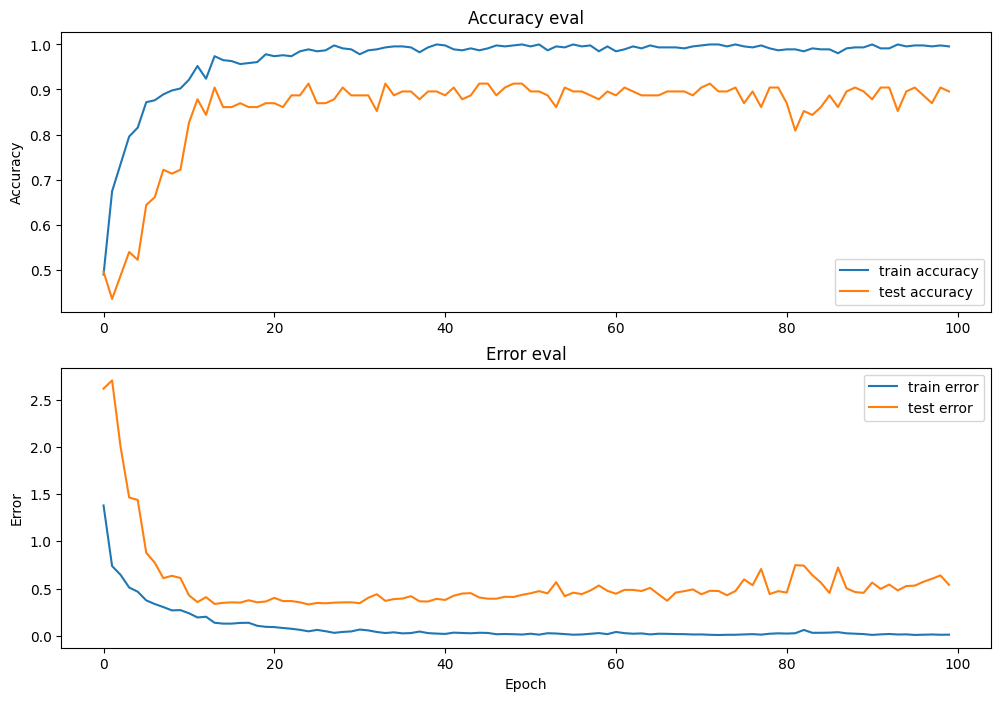

In [47]:
plot_history(history)

# **Evaluating the model performance


In [48]:
def predict(model,X):
    #X = X[np.newaxis,...] #size of X (1,130,13,1) [Conversion to be done if entering one value],
    prediction = model.predict(X) #prediction contains 3 values - probability for each genre [[0.1, 0.2, ..]],
    #print(prediction),
    #extract index with max value,
    predicted_index = np.argmax(prediction,axis=1)
    return predicted_index

In [49]:
y_pred = predict(model,X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


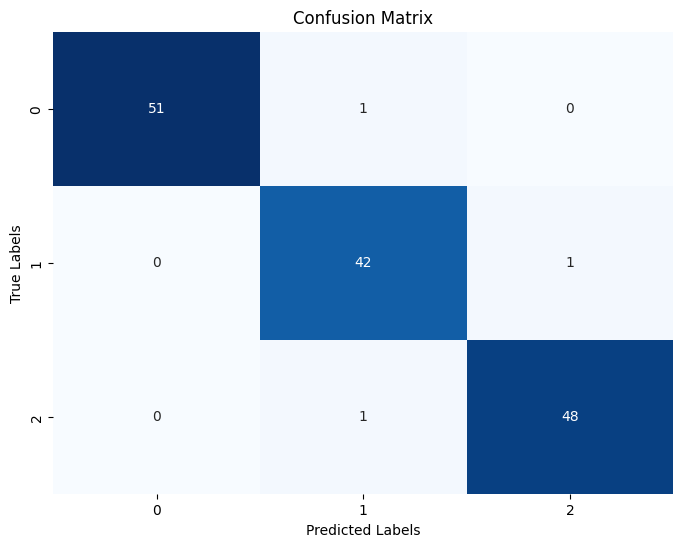

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=True, yticklabels=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Display the plot
plt.show()


In [51]:

y_train_pred = predict(model,X_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [52]:
y_validation_pred = predict(model,X_validation)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [53]:
y_validation_pred = predict(model,X_validation)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


## Confusion Matrix for Training Data

In this section, we compute and visualize the confusion matrix to evaluate the model's performance on the training data. The confusion matrix helps to understand how well the model is classifying the data, especially how many predictions are correct for each class.

### Steps:

1. **Compute the Confusion Matrix**:
   The confusion matrix is calculated using the `confusion_matrix` function from `sklearn.metrics`. It compares the true labels (`y_train`) with the predicted labels (`y_train_pred`) on the training set.

2. **Visualize the Confusion Matrix**:
   A heatmap is generated using `seaborn` to visualize the confusion matrix. The heatmap is color-coded to show the number of correct and incorrect predictions for each class, making it easier to spot patterns in the model’s performance.

3. **Plot Details**:
   - The `annot=True` option annotates each cell with the corresponding number.
   - The `fmt="d"` argument ensures that the values are formatted as integers.
   - The `cmap="Blues"` argument applies a blue color scheme for the heatmap.
   - `xticklabels=True` and `yticklabels=True` ensure that the labels for each axis are visible.



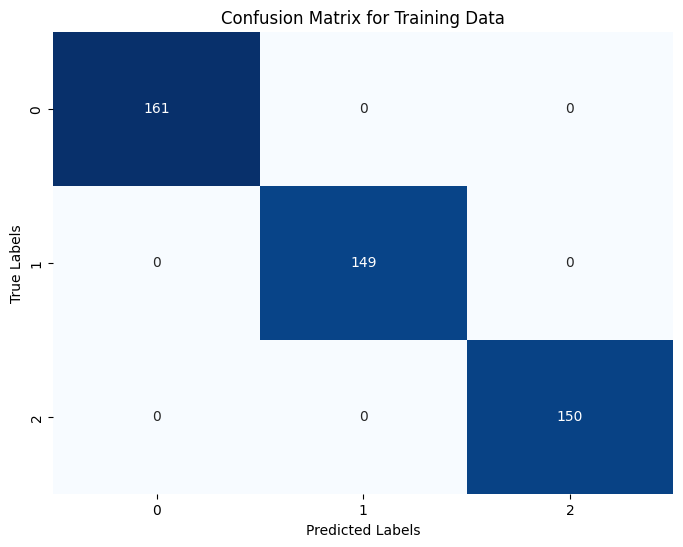

In [54]:
cm_train = confusion_matrix(y_train, y_train_pred)

# Plotting the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=True, yticklabels=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')

# Display the plot
plt.show()

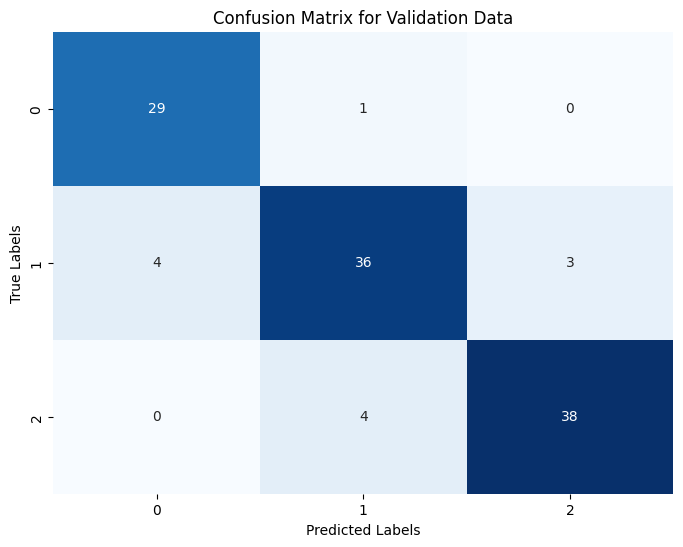

In [56]:
cm_validation = confusion_matrix(y_validation, y_validation_pred)

# Plotting the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_validation, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=True, yticklabels=True)

# Labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Validation Data')

# Display the plot
plt.show()

In [57]:
model.save('CNN_model_calm_happy_angry.h5')

In [58]:
sampling_rate = 22050

In [59]:
trained_model = tf.keras.models.load_model('CNN_model_calm_happy_angry.h5')


## Prediction Function for the Model

In this section, we define a function to make predictions using the trained model. The function takes the model and input data as arguments, and it returns the predicted class labels based on the model's output probabilities.

### Steps:

1. **Model Prediction**:
   The `model.predict(X)` function is used to generate the predicted probabilities for each class. The prediction will contain three values (since there are 3 classes in this case), which represent the probability of each class.

2. **Extract Predicted Class**:
   The `np.argmax(prediction, axis=1)` function is used to extract the index of the class with the highest probability. This index corresponds to the predicted class label.

3. **Return Predicted Index**:
   The function returns the predicted class labels, which are the indices corresponding to the highest probability for each sample.

In [60]:
def predict(model,X):
    prediction = model.predict(X) #prediction contains 3 values - probability for each genre [[0.1, 0.2, ..]]
    predicted_index = np.argmax(prediction,axis=1)
    return predicted_index

## Checking Audio Duration

In this section, we load an audio file and check its duration. The code ensures that the audio file meets a minimum duration requirement before proceeding with further processing.

### Steps:

1. **Load Audio File**:
   The `librosa.load()` function is used to load the audio file (`calm_2.wav` in this case). It returns the audio signal (`my_test_audio`) and the sample rate (`sr`). The sample rate is set to a specified `sampling_rate`.

2. **Get Audio Duration**:
   The `librosa.get_duration()` function calculates the duration of the audio file in seconds. The duration is rounded to the nearest whole number for simplicity.

3. **Check Duration**:
   If the duration of the audio is shorter than the required standard duration (`std_duration = 3` seconds), a message is printed notifying the user that the audio file should be at least 3 seconds long.


In [75]:
my_test_audio, sr = librosa.load('/content/sample_data/calm_2.wav', sr=sampling_rate)
audio_duration = round(librosa.get_duration(y=my_test_audio, sr=sr), 0)
std_duration = 3

if audio_duration < std_duration:
    print("The audio should be at least 3 seconds long")


In [76]:
Audio(data=my_test_audio,rate=sampling_rate)

In [77]:
# Extracting input features
mfcc_test = librosa.feature.mfcc(y=my_test_audio[:sampling_rate*(std_duration)], sr=sampling_rate, n_mfcc=13, n_fft=2048, hop_length=512)
mfcc_test = mfcc_test.T
mfcc_test = mfcc_test[np.newaxis, ..., np.newaxis]


In [78]:
#Making predictions
y_pred = predict(trained_model,mfcc_test)
Emotions = {0:'calm', 1:'happy',2:'angry'}
Emotions[y_pred[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


'angry'

In [71]:
my_test_audio, sr = librosa.load('/content/sample_data/angry_set.wav', sr=sampling_rate)
audio_duration = round(librosa.get_duration(y=my_test_audio, sr=sr), 0)
std_duration = 3

if audio_duration < std_duration:
    print("The audio should be at least 3 seconds long")

In [72]:
Audio(data=my_test_audio,rate=sampling_rate)

In [73]:
# Extracting input features
mfcc_test = librosa.feature.mfcc(y=my_test_audio[:sampling_rate*(std_duration)], sr=sampling_rate, n_mfcc=13, n_fft=2048, hop_length=512)
mfcc_test = mfcc_test.T
mfcc_test = mfcc_test[np.newaxis, ..., np.newaxis]


In [74]:
#Making predictions
y_pred = predict(trained_model,mfcc_test)
Emotions = {0:'calm', 1:'happy',2:'angry'}
Emotions[y_pred[0]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


'angry'

# **LSTM Model**


## Building and Training an LSTM Model

In this section, we define and train a Long Short-Term Memory (LSTM) model to classify audio data. The model is built using Keras and TensorFlow, and it is trained using the prepared training and validation datasets.

### Steps:

1. **Build LSTM Model**:
   The `build_lstm_model()` function constructs the LSTM-based neural network. The model consists of:
   - **Input Layer**: The input shape is specified based on the number of features and timesteps.
   - **Bidirectional LSTM Layers**: Two layers of bidirectional LSTMs with 64 units each. The first LSTM layer returns sequences, which are passed to the second LSTM layer.
   - **Fully Connected Layer**: A dense layer with 64 units and ReLU activation function, followed by a dropout layer to prevent overfitting.
   - **Output Layer**: A softmax layer with 3 units, which corresponds to the 3 classes for classification.

2. **Compile the Model**:
   The model is compiled with:
   - **Optimizer**: Adam optimizer is used for training.
   - **Loss Function**: Sparse categorical cross-entropy is used since we have multi-class classification.
   - **Metrics**: Accuracy is chosen as the evaluation metric.

3. **Train the Model**:
   The model is trained using the training data `X_train` and `y_train`. During training, the last dimension of `X_train` is removed as the LSTM expects 2D input (timesteps, features).
   - **Validation Data**: The validation data `X_validation` and `y_validation` are used to evaluate the model during training.
   - **Batch Size and Epochs**: The model is trained for 100 epochs with a batch size of 32.

In [79]:
def build_lstm_model(input_shape):
    model = tf.keras.Sequential()

    # Instead of using Reshape, we define the input properly
    model.add(tf.keras.layers.Input(shape=(input_shape[0], input_shape[1])))

    # LSTM layers
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)))
    model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)))

    # Fully connected layers
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.3))

    # Output layer
    model.add(tf.keras.layers.Dense(3, activation="softmax"))

    return model

# Adjust the input shape for LSTM
input_shape_lstm = (X_train.shape[1], X_train.shape[2])  # Removing the last dimension

# Build and compile the LSTM model
lstm_model = build_lstm_model(input_shape_lstm)
lstm_model.compile(optimizer=tf.keras.optimizers.Adam(),
                   loss="sparse_categorical_crossentropy",
                   metrics=["accuracy"])

# Train the model
history_lstm = lstm_model.fit(X_train[..., 0], y_train,  # Removing last dimension during training
                              validation_data=(X_validation[..., 0], y_validation),
                              batch_size=32, epochs=100)


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 14s 333ms/step - accuracy: 0.4045 - loss: 1.0909 - val_accuracy: 0.6696 - val_loss: 0.8996
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 274ms/step - accuracy: 0.6050 - loss: 0.8883 - val_accuracy: 0.6522 - val_loss: 0.7066
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.7012 - loss: 0.6776 - val_accuracy: 0.7652 - val_loss: 0.5681
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.7405 - loss: 0.5763 - val_accuracy: 0.6261 - val_loss: 0.7930
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.7471 - loss: 0.5369 - val_accuracy: 0.7043 - val_loss: 0.6278
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 269ms/step - accuracy: 0.7874 - loss: 0.5192 - val_accuracy: 0.7739 - val_loss: 0.5724
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 333ms/step - accuracy: 0.8083 - loss: 0.4688 - val_accuracy: 0.7565 - val_loss: 0.5350
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.8396 - loss: 0.4191 - val_acc

In [87]:
# Get training and validation accuracy
train_acc = history_lstm.history['accuracy'][-1]  # Last epoch training accuracy
val_acc = history_lstm.history['val_accuracy'][-1]  # Last epoch validation accuracy

print(f"Final Training Accuracy: {train_acc:.4f}")
print(f"Final Validation Accuracy: {val_acc:.4f}")


Final Training Accuracy: 1.0000
Final Validation Accuracy: 0.9217


In [88]:
def predict_lstm(model, X):
    # Reshape input to (samples, timesteps, features)
    X = X[..., 0]  # Remove the last dimension (1) to match LSTM expected shape
    prediction = model.predict(X)

    # Extract index with max probability
    predicted_index = np.argmax(prediction, axis=1)
    return predicted_index


# **Testing the model using LSTM**

In [89]:
def build_lstm_model(input_shape):
    model = tf.keras.Sequential()

    # Add LSTM layer with proper input shape
    model.add(tf.keras.layers.LSTM(64, input_shape=input_shape, return_sequences=False))

    # Dense layer
    model.add(tf.keras.layers.Dense(64, activation='relu'))

    # Output layer with softmax
    model.add(tf.keras.layers.Dense(3, activation='softmax'))

    return model


In [82]:
def predict_lstm(model, X):
    # Check the shape of the input
    print(f"Input shape to model: {X.shape}")

    prediction = model.predict(X)  # Make prediction using LSTM model

    # Extract the index with max probability
    predicted_index = np.argmax(prediction, axis=1)
    return predicted_index


In [91]:
print(f"Original MFCC Test Shape: {mfcc_test.shape}")

# Check if the second dimension is 1 before squeezing
if mfcc_test.shape[1] == 1:
    mfcc_test = np.squeeze(mfcc_test, axis=1)

print(f"Reshaped MFCC Test Shape: {mfcc_test.shape}")


Original MFCC Test Shape: (1, 130, 13)
Reshaped MFCC Test Shape: (1, 130, 13)


In [85]:
# Define the sample rate and duration for the test (you may already have these variables defined)
sampling_rate = 22050  # Example sample rate (adjust as needed)
std_duration = 3  # Example duration in seconds (adjust as needed)

# Load the audio
my_test_audio, sr = librosa.load('/content/sample_data/calm_2.wav', sr=sampling_rate)

# Extract MFCC features for the first 3 seconds
mfcc_test = librosa.feature.mfcc(y=my_test_audio[:sampling_rate*std_duration],
                                 sr=sampling_rate,
                                 n_mfcc=13,
                                 n_fft=2048,
                                 hop_length=512)

# Verify MFCC shape (13, time_steps)
print(f"MFCC Shape: {mfcc_test.shape}")

# Transpose to get shape (time_steps, features) => (130, 13)
mfcc_test = mfcc_test.T  # Shape: (130, 13)

# Add batch dimension (1, time_steps, features) => (1, 130, 13)
mfcc_test = np.expand_dims(mfcc_test, axis=0)  # Shape: (1, 130, 13)

# Print the shape of the final input
print(f"Reshaped MFCC Shape: {mfcc_test.shape}")

# Predict using the LSTM model
predicted_label = predict_lstm(lstm_model, mfcc_test)

# Print the predicted label
print(f"Predicted Class: {predicted_label[0]}")

MFCC Shape: (13, 130)
Reshaped MFCC Shape: (1, 130, 13)
Input shape to model: (1, 130, 13)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step
Predicted Class: 2


The below audio contains

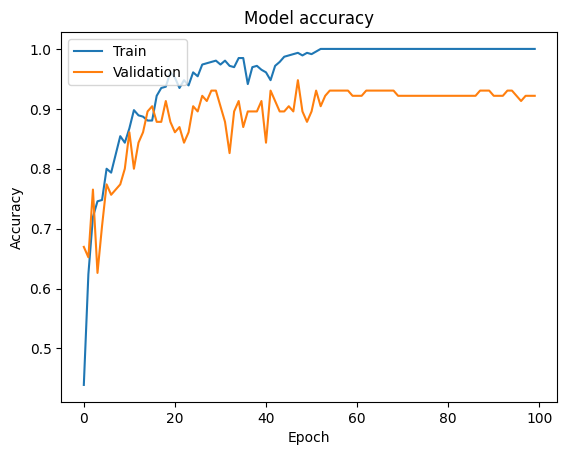

In [92]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step


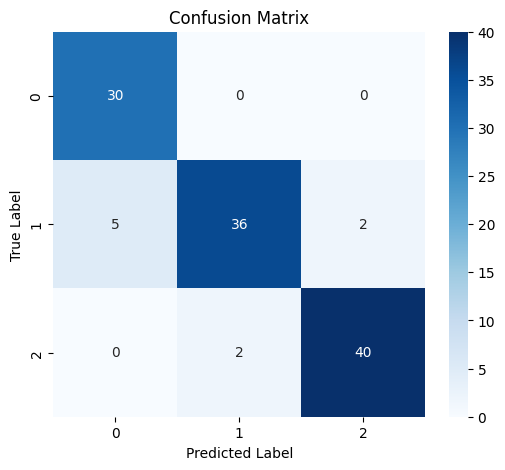

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the validation/test set
y_pred = lstm_model.predict(X_validation[..., 0])  # Removing last dimension
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class indices

# Compute confusion matrix
cm = confusion_matrix(y_validation, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [94]:
# Print the final training accuracy
train_accuracy = history_lstm.history['accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy * 100:.2f}%")

# Print the final validation accuracy
val_accuracy = history_lstm.history['val_accuracy'][-1]
print(f"Final Validation Accuracy: {val_accuracy * 100:.2f}%")


Final Training Accuracy: 100.00%
Final Validation Accuracy: 92.17%


# **HYBRID MODEL**

Hybrid CNN-LSTM Model for Audio Classification
Overview
The model combines Convolutional Neural Networks (CNNs) for feature extraction and Long Short-Term Memory (LSTM) networks for sequential learning. This hybrid architecture is designed for audio classification tasks where both spatial and temporal patterns in the data are important. The input to the model is MFCC (Mel Frequency Cepstral Coefficients) features extracted from audio files.

**Model Architecture CNN Layers (Feature Extraction):**

Conv2D: Convolution layers with ReLU activation to extract spatial features from the input data.
MaxPooling2D: Pooling layers to reduce the spatial dimensions after each convolution layer.
BatchNormalization: To stabilize and accelerate the training process.
Reshaping: After extracting features through CNN layers, the data is reshaped to be suitable for LSTM layers, changing the shape to (time_steps, features).

**LSTM Layers (Sequential Learning):**

Two Bidirectional LSTM layers are used to capture both past and future dependencies in the sequential data.
LSTM(64): Each LSTM layer has 64 units. The return_sequences=True argument in the first LSTM layer ensures that the LSTM outputs the sequence of data for the next LSTM layer.
Fully Connected Layers:

A fully connected Dense layer with ReLU activation is used for decision-making.
Dropout: A dropout layer is applied with a rate of 0.3 to prevent overfitting.
**Output Layer:**

Softmax output layer with 3 units for multi-class classification (3 emotions: Calm, Happy, Angry).

**Model Compilation and Training**

**Optimizer:** Adam optimizer is used for model training.

**Loss Function:** Sparse categorical cross-entropy is used since the target labels are integers.

**Metrics:** Accuracy is used as the evaluation metric.

In [96]:
import tensorflow as tf

def build_hybrid_model(input_shape):
    model = tf.keras.Sequential()

    # CNN Layers for Feature Extraction
    model.add(tf.keras.layers.Input(shape=input_shape))  # Proper input shape
    model.add(tf.keras.layers.Conv2D(16, (3,3), activation="relu", padding="same"))
    model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
    model.add(tf.keras.layers.MaxPooling2D((2,2), padding='same'))
    model.add(tf.keras.layers.BatchNormalization())

    # Flatten CNN output and reshape for LSTM
    model.add(tf.keras.layers.Reshape((input_shape[0]//4, -1)))  # Ensure proper LSTM input shape

    # LSTM Layers for Sequential Learning
    model.add(tf.keras.layers.LSTM(64, return_sequences=True))
    model.add(tf.keras.layers.LSTM(64))

    # Fully Connected Layers
    model.add(tf.keras.layers.Dense(64, activation="relu"))
    model.add(tf.keras.layers.Dropout(0.3))

    # Output Layer for Classification
    model.add(tf.keras.layers.Dense(3, activation="softmax"))

    return model

# Define input shape (assuming MFCC with shape (time_steps, frequency_bins, channels))
input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3])

# Build and compile model
hybrid_model = build_hybrid_model(input_shape)
hybrid_model.compile(optimizer=tf.keras.optimizers.Adam(),
                     loss="sparse_categorical_crossentropy",
                     metrics=["accuracy"])

# Train the model
history_hybrid = hybrid_model.fit(X_train, y_train,
                                  validation_data=(X_validation, y_validation),
                                  batch_size=32, epochs=100)

# Evaluate on test set
test_loss, test_acc = hybrid_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 145ms/step - accuracy: 0.5353 - loss: 1.0257 - val_accuracy: 0.2609 - val_loss: 1.7785
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.7231 - loss: 0.6781 - val_accuracy: 0.2609 - val_loss: 2.6845
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.7177 - loss: 0.6427 - val_accuracy: 0.2609 - val_loss: 2.4619
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.7518 - loss: 0.5530 - val_accuracy: 0.3652 - val_loss: 1.8838
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step - accuracy: 0.8240 - loss: 0.4815 - val_accuracy: 0.4435 - val_loss: 1.9905
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.8527 - loss: 0.3874 - val_accuracy: 0.6174 - val_loss: 1.5693
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.9208 - loss: 0.2262 - val_accuracy: 0.5913 - val_loss: 1.7872
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9235 - loss: 0.2454 - val_accuracy

In [97]:
# Get predictions from the model
y_pred_probs = hybrid_model.predict(X_test)  # Get probability outputs
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert to class labels


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 201ms/step


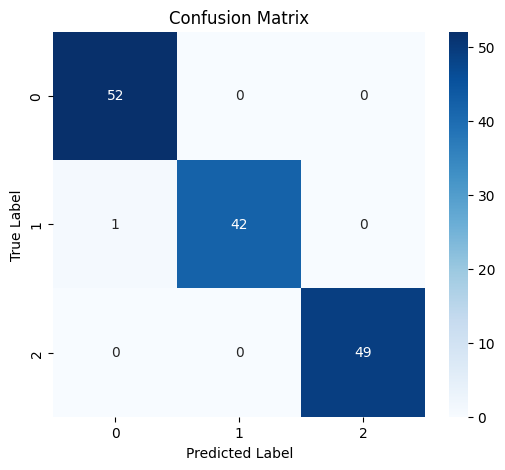

In [98]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [100]:
# Generate precision, recall, and F1-score
from sklearn.metrics import confusion_matrix, classification_report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1", "Class 2"])
print(report)


              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99        52
     Class 1       1.00      0.98      0.99        43
     Class 2       1.00      1.00      1.00        49

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



# **Precision, Recall, F1-Score Bar Chart**

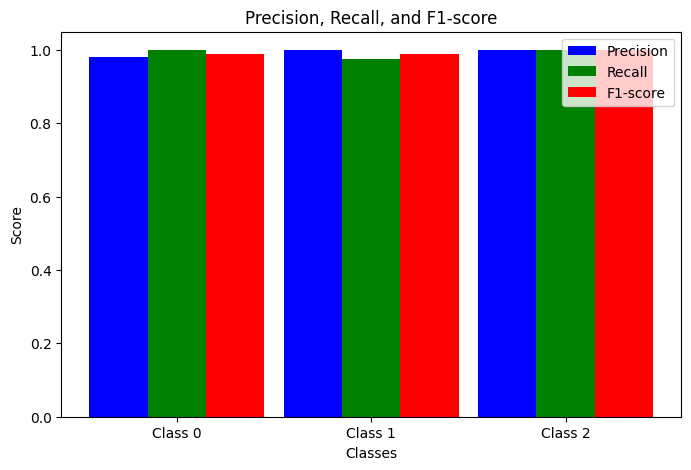

In [101]:
from sklearn.metrics import precision_recall_fscore_support

# Get precision, recall, f1-score
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average=None)

# Plot bar chart
plt.figure(figsize=(8, 5))
labels = ["Class 0", "Class 1", "Class 2"]
x = np.arange(len(labels))
width = 0.3

plt.bar(x - width, precision, width=width, label="Precision", color="blue")
plt.bar(x, recall, width=width, label="Recall", color="green")
plt.bar(x + width, f1, width=width, label="F1-score", color="red")

plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score")
plt.xticks(ticks=x, labels=labels)
plt.legend()
plt.show()


# **Training vs Validation Accuracy Curve**


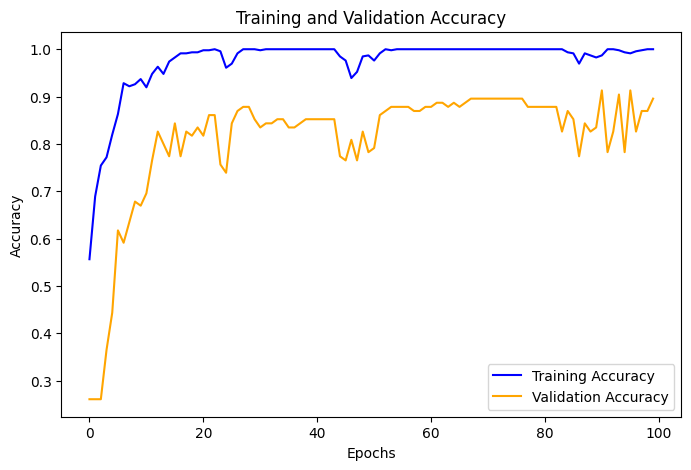

In [102]:
# Plot accuracy curve
plt.figure(figsize=(8,5))
plt.plot(history_hybrid.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_hybrid.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


#**Training vs Validation Loss Curve**

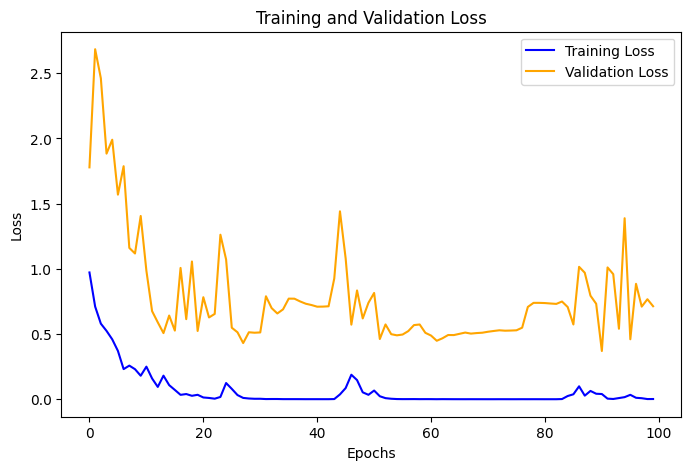

In [103]:
# Plot loss curve
plt.figure(figsize=(8,5))
plt.plot(history_hybrid.history['loss'], label='Training Loss', color='blue')
plt.plot(history_hybrid.history['val_loss'], label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


In [105]:
# Get predictions for each model
y_pred_cnn = np.argmax(model.predict(X_test), axis=1)
y_pred_lstm = np.argmax(lstm_model.predict(X_test[..., 0]), axis=1)  # Adjust for LSTM input
y_pred_hybrid = np.argmax(hybrid_model.predict(X_test), axis=1)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [106]:
# Calculate metrics for CNN
precision_cnn, recall_cnn, f1_cnn, _ = precision_recall_fscore_support(y_test, y_pred_cnn, average='macro')

# Calculate metrics for LSTM
precision_lstm, recall_lstm, f1_lstm, _ = precision_recall_fscore_support(y_test, y_pred_lstm, average='macro')

# Calculate metrics for Hybrid Model
precision_hybrid, recall_hybrid, f1_hybrid, _ = precision_recall_fscore_support(y_test, y_pred_hybrid, average='macro')


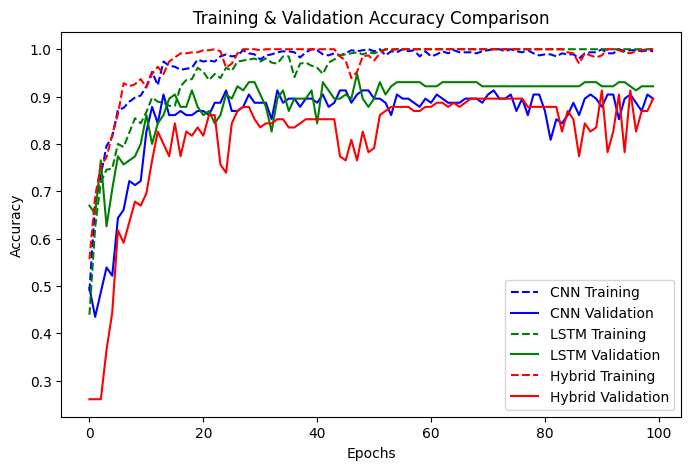

In [107]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='CNN Training', color='blue', linestyle='dashed')
plt.plot(history.history['val_accuracy'], label='CNN Validation', color='blue')

plt.plot(history_lstm.history['accuracy'], label='LSTM Training', color='green', linestyle='dashed')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Validation', color='green')

plt.plot(history_hybrid.history['accuracy'], label='Hybrid Training', color='red', linestyle='dashed')
plt.plot(history_hybrid.history['val_accuracy'], label='Hybrid Validation', color='red')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy Comparison')
plt.legend()
plt.show()


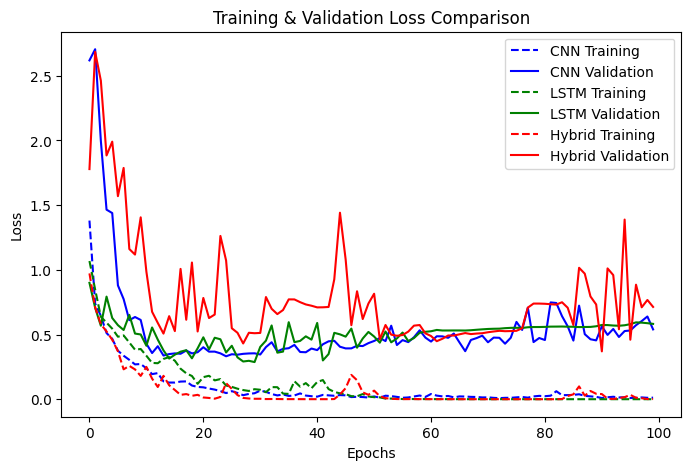

In [108]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='CNN Training', color='blue', linestyle='dashed')
plt.plot(history.history['val_loss'], label='CNN Validation', color='blue')

plt.plot(history_lstm.history['loss'], label='LSTM Training', color='green', linestyle='dashed')
plt.plot(history_lstm.history['val_loss'], label='LSTM Validation', color='green')

plt.plot(history_hybrid.history['loss'], label='Hybrid Training', color='red', linestyle='dashed')
plt.plot(history_hybrid.history['val_loss'], label='Hybrid Validation', color='red')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss Comparison')
plt.legend()
plt.show()


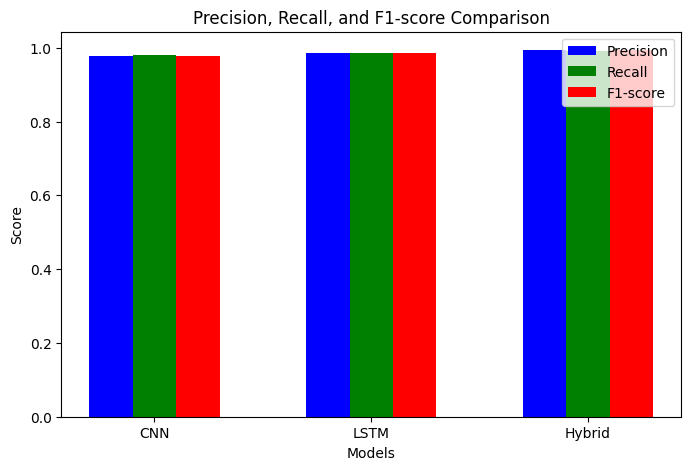

In [109]:
# Data
models = ['CNN', 'LSTM', 'Hybrid']
precision_scores = [precision_cnn, precision_lstm, precision_hybrid]
recall_scores = [recall_cnn, recall_lstm, recall_hybrid]
f1_scores = [f1_cnn, f1_lstm, f1_hybrid]

# Plot
x = np.arange(len(models))
width = 0.2

plt.figure(figsize=(8, 5))
plt.bar(x - width, precision_scores, width=width, label="Precision", color="blue")
plt.bar(x, recall_scores, width=width, label="Recall", color="green")
plt.bar(x + width, f1_scores, width=width, label="F1-score", color="red")

plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score Comparison")
plt.xticks(ticks=x, labels=models)
plt.legend()
plt.show()
